# 线性回归

## 【关键词】最小二乘法，线性

## 一、普通线性回归

### 1、原理

分类的目标变量是标称型数据，而回归将会对连续型的数据做出预测。

应当怎样从一大堆数据里求出回归方程呢？

假定输人数据存放在矩阵X中，而回归系数存放在向量W中。那么对于给定的数据X1, 预测结果将会通过

Y=X*W

给出。现在的问题是，手里有一些X和对应的Y,怎样才能找到W呢？

一个常用的方法就是找出使误差最小的W。这里的误差是指预测Y值和真实Y值之间的差值，使用该误差的简单累加将使得正差值和负差值相互抵消，所以我
们采用平方误差。

最小二乘法

平方误差可以写做:

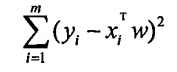

对W求导，当导数为零时，平方误差最小，此时W等于：

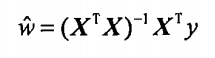

例如有下面一张图片：

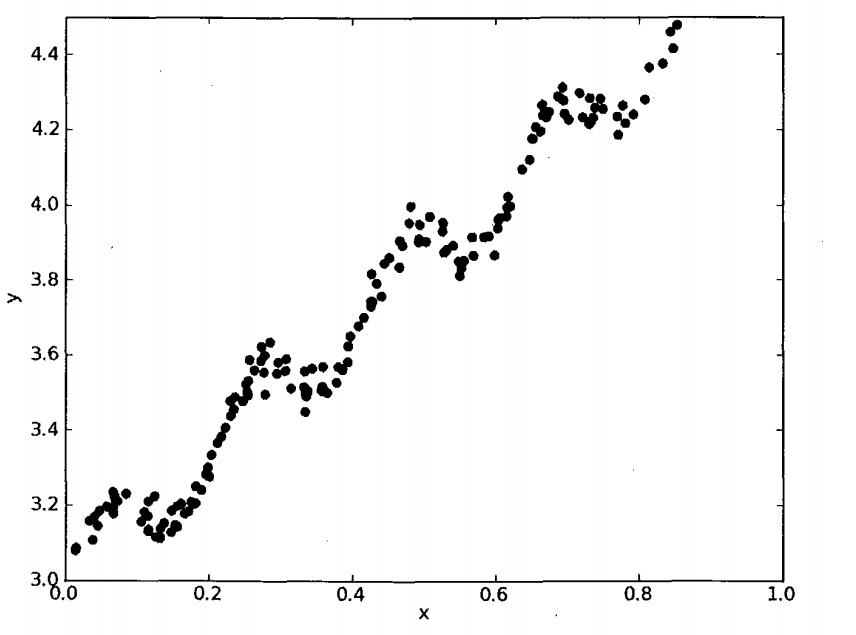

求回归曲线，得到：

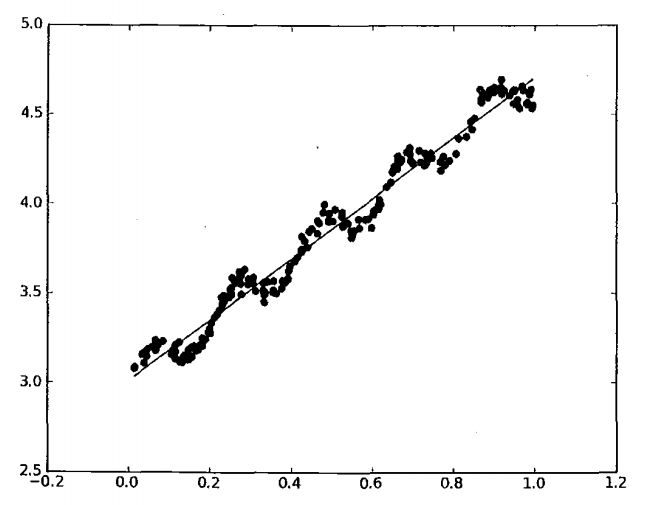

In [ ]:
x^2 + y^2 = z^2

#费马大定理
x^n + y^n = z^n
n>=3

x y z != 1\0 

### 2、实例

导包

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

import sklearn.datasets as datasets

获取糖尿病数据

In [2]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ..., 
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
         310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
          97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
          85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
         265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,

In [3]:
x_data = diabetes.data
y_target = diabetes.target

In [5]:
y_target

array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
        310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
         97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
         85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
        265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,
         53.,  190.,  142.,   75.,  142.,  155.,  225.,   59.,  104.,
        182.,  128.,   52.,   37.,  170.,  170.,   61.,  144.,   52.,
        128.,   71.,  163.,  150.,   97.,  160.,  178.,   48.,  270.,
        202.,  111.,   85.,   42.,  170.,  200.,  252.,  113.,  143.,
         51.,   52.,  210.,   65.,  141.,   55.,  134.,   42.,  111.,
         98.,  164.,   48.,   96.,   90.,  162.,  150.,  279.,   92.,
         83.,  128.,  102.,  302.,  198.,   95.,   53.,  134.,  144.,
        232.,   81.,  104.,   59.,  246.,  297.,  258.,  229.,  275.,
        281.,  179.,  200.,  200.,  173.,  180.,   84.,  121.,  161.,
         99.,  109.,

抽取训练数据和预测数据

In [4]:
x_data.shape

(442, 10)

In [8]:
#获取索引是2的属性进行研究
# x_data[:,2,np.newaxis] == reshape()
X_train = x_data[:,2,np.newaxis]

In [14]:
from sklearn.model_selection import train_test_split

X_train,x_test,y_train,y_test = train_test_split(X_train,y_target,test_size = 0.05)

In [15]:
X_train.shape

(419, 1)

创建数学模型

In [16]:
lrg = LinearRegression()

第一步：训练

In [18]:
lrg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

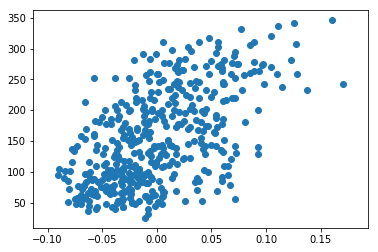

In [13]:
plt.scatter(X_train,y_target)

第二步：预测

In [19]:
y_ = lrg.predict(x_test)

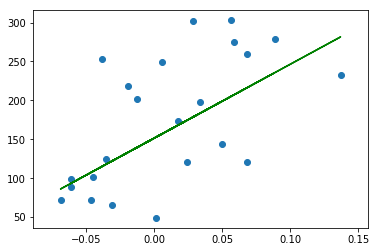

In [22]:
plt.scatter(x_test,y_test)

plt.plot(x_test,y_,'green')

#KNN 回归有什么区别
#结果，过程不同
#KNN k近邻算法 ，最近的几个点生成预测的数据
#线性回归：最小二乘法

## 二、岭回归

In [23]:
from sklearn.linear_model import Ridge

### 1、原理

缩减系数来“理解”数据

In [24]:
x_data.shape
#442 样本；10，特征，或者属性

(442, 10)

In [25]:
x_data = x_data.reshape((10,442))
x_data.shape

#10 个样本，442 个属性
#442 属性，关键属性

(10, 442)

In [ ]:
x + y = 2

2x + 3y = 6

#满秩矩阵
1 1
2 3

1 1
0 1

1 0
0 1

x + y = 2 

2x + 2y = 4

1 1 
2 2

1 1 
0 0

In [27]:
a.shape

(3, 3)

In [29]:
X_train = np.array([[3,3.5,2],[3.2,3.6,3],[6.6,7,4]])
#查看秩
np.linalg.matrix_rank(X_train)

#值
y_train = np.array([1,2,3])

3

In [ ]:
3x + 3.2y + 6.6z = 1

3.5x + 3.6y + 7z = 2

2x + 3y + 4z = 3

In [ ]:
[x1,x2]*[[3,3.5],[3.2,3.6]] = [118.4,135.2]

In [ ]:
[x1,x2]*[[3,3.5],[3.2,3.6]]*price_ = [118.4,135.2]*price_

[x1,x2]*I = [118.4,135.2]*price_

[x1,x2] = [118.4,135.2]*price_

In [31]:
price = np.array([[3,3.5],[3.2,3.6]])

total_price = np.array([118.4,135.2])

#求解price的逆矩阵
price_ = np.linalg.inv(price)

In [32]:
price_

array([[-9.  ,  8.75],
       [ 8.  , -7.5 ]])

In [33]:
np.dot(total_price,price_)

#16个小孩，22个大人

array([ 16.,  22.])

如果数据的特征比样本点还多应该怎么办？是否还可以使用线性回归和之前的方法来做预测？

答案是否定的，即不能再使用前面介绍的方法。这是因为输入数据的矩阵X不是满秩矩阵。非满秩矩阵在求逆时会出现问题。

为了解决这个问题，统计学家引入了岭回归（ridge regression)的概念

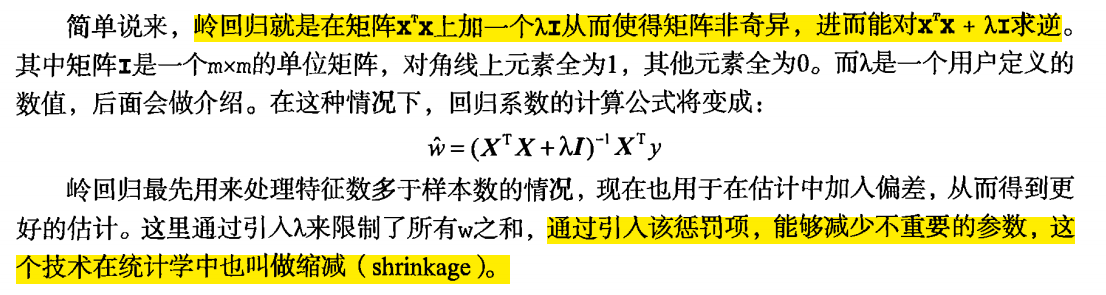

缩减方法可以去掉不重要的参数，因此能更好地理解数据。此外，与简单的线性回归相比，缩减法能取得更好的预测效果。

岭回归是加了二阶正则项的最小二乘，主要适用于过拟合严重或各变量之间存在多重共线性的时候，岭回归是有bias的，这里的bias是为了让variance更小。

In [ ]:
#统计时候，统计身高，三列，三个属性，sg1，sg2，sg3，身高，身长，身宽
#共线性
#去重

#### 归纳总结

1.岭回归可以解决特征数量比样本量多的问题

2.岭回归作为一种缩减算法可以判断哪些特征重要或者不重要，有点类似于降维的效果

3.缩减算法可以看作是对一个模型增加偏差的同时减少方差

岭回归用于处理下面两类问题：

1.数据点少于变量个数

2.变量间存在共线性（最小二乘回归得到的系数不稳定，方差很大）

### 2、实例

岭回归一般用在样本值不够的时候

In [34]:
#10 个方程，30个未知数
X_train = np.random.randint(0,100,size = (10,30))

y_train = np.random.randint(0,10,size = 10)

使用普通线性回归

In [35]:
lrg = LinearRegression()
lrg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
x_test = X_train[::2]
y_test = y_train[::2]

In [37]:
lrg.predict(x_test)

array([ 5.,  8.,  3.,  2.,  9.])

In [38]:
y_test

array([5, 8, 3, 2, 9])

使用岭回归

In [43]:
#lamada*I 二阶正则项
#alpha == 0 Ridge 就是LinearRegressor
ridge = Ridge(alpha=1)

ridge.fit(X_train,y_train)

ridge.predict(x_test)

array([ 4.99995677,  7.99989805,  3.00005421,  2.00011433,  8.99989924])

In [45]:
lrg.coef_

array([ 0.00830462, -0.00145981,  0.00188591,  0.00158432, -0.01481222,
        0.00245722, -0.02049618,  0.00489645, -0.00174031, -0.00847468,
        0.00540088,  0.00253681, -0.00606542,  0.00925269, -0.00254286,
       -0.00919959, -0.01139459, -0.00798292, -0.00740935,  0.01379077,
        0.00223225, -0.0141356 ,  0.00825916,  0.00430338, -0.00501868,
        0.00874445,  0.0150237 , -0.00089584, -0.00456173, -0.00282991])

In [44]:
ridge.coef_

array([ 0.00830437, -0.00145946,  0.00188598,  0.00158436, -0.01481182,
        0.00245715, -0.0204955 ,  0.00489624, -0.00174004, -0.00847447,
        0.00540042,  0.00253691, -0.00606522,  0.00925223, -0.00254304,
       -0.00919952, -0.01139439, -0.00798277, -0.00740917,  0.01379028,
        0.00223205, -0.01413518,  0.00825878,  0.00430337, -0.00501854,
        0.00874417,  0.01502332, -0.00089573, -0.00456144, -0.00282982])

In [41]:
y_test

array([5, 8, 3, 2, 9])

In [48]:
X.shape

(10, 10)

In [47]:
X

array([[ 1.        ,  0.5       ,  0.33333333,  0.25      ,  0.2       ,
         0.16666667,  0.14285714,  0.125     ,  0.11111111,  0.1       ],
       [ 0.5       ,  0.33333333,  0.25      ,  0.2       ,  0.16666667,
         0.14285714,  0.125     ,  0.11111111,  0.1       ,  0.09090909],
       [ 0.33333333,  0.25      ,  0.2       ,  0.16666667,  0.14285714,
         0.125     ,  0.11111111,  0.1       ,  0.09090909,  0.08333333],
       [ 0.25      ,  0.2       ,  0.16666667,  0.14285714,  0.125     ,
         0.11111111,  0.1       ,  0.09090909,  0.08333333,  0.07692308],
       [ 0.2       ,  0.16666667,  0.14285714,  0.125     ,  0.11111111,
         0.1       ,  0.09090909,  0.08333333,  0.07692308,  0.07142857],
       [ 0.16666667,  0.14285714,  0.125     ,  0.11111111,  0.1       ,
         0.09090909,  0.08333333,  0.07692308,  0.07142857,  0.06666667],
       [ 0.14285714,  0.125     ,  0.11111111,  0.1       ,  0.09090909,
         0.08333333,  0.07692308,  0.07142857

In [50]:
np.logspace(0,2,10)

array([   1.        ,    1.66810054,    2.7825594 ,    4.64158883,
          7.74263683,   12.91549665,   21.5443469 ,   35.93813664,
         59.94842503,  100.        ])

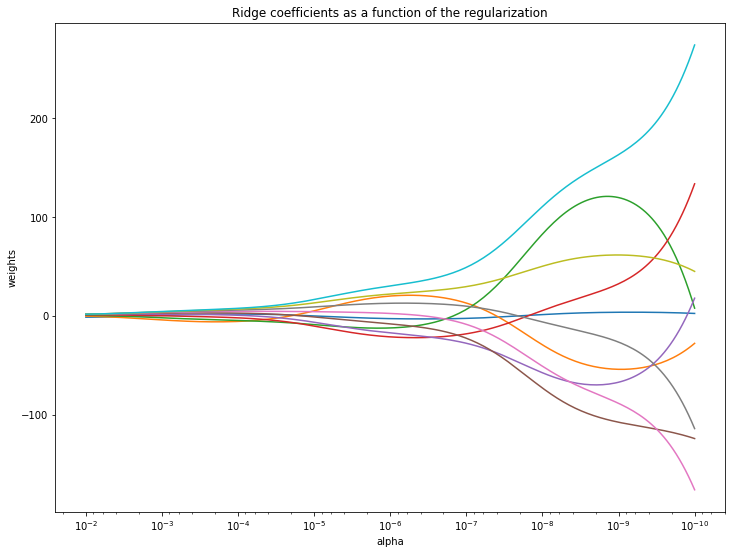

In [52]:
#岭迹线

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
#10元一次方成
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])

#结果，方程的结果值
y = np.ones(10)

###############################################################################
# Compute paths

#设置200个alpha---->200 coef_ 比重
n_alphas = 200
#0.00000000001 ~ 0.01 之间选取200个数
alphas = np.logspace(-10, -2, n_alphas)

#intercept 截距
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    #动态设置alpha
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results
plt.figure(figsize=(12,9))
#获取当前的画面
#get current axes
ax = plt.gca()


ax.plot(alphas, coefs)
#坐标轴刻度显示的单位 log
ax.set_xscale('log')

#limit xmin xmax 坐标刻度进行了反转
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## 三、lasso回归

### 1、原理

【拉格朗日乘数法】

对于参数w增加一个限定条件，能到达和岭回归一样的效果：

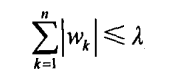

在lambda足够小的时候，一些系数会因此被迫缩减到0

### 2、实例

## 四、普通线性回归、岭回归与lasso回归比较

导包，导入sklearn.metrics.r2_score用于给模型打分

使用numpy创建数据X，创建系数，对系数进行处理，对部分系数进行归零化操作，然后根据系数进行矩阵操作求得目标值  
增加噪声

训练数据和测试数据

分别使用线性回归，岭回归，Lasso回归进行数据预测

数据视图，此处获取各个算法的训练数据的coef_:系数

## 五、练习

### 1、使用多种方法对boston数据集进行回归，画出回归图像，并比较多种回归方法的效果

`
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
`

### 2、预测鲍鱼的年龄

abalone.txt